In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_titanic = pd.read_csv('train.csv')
#it imports libraries that we need and it reads dataset from csv file
print(df_titanic.head(6))
#it prints first 6 rows of dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

In [3]:
#q2
for col in df_titanic.columns:
    print(col)
    #it prints column names

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [4]:
#q3
print(len(df_titanic))
#it prints length of the dataset

891


In [5]:
#q4
print("Age", df_titanic.isnull().sum()['Age'])
print("Cabin", df_titanic.isnull().sum()['Cabin'])
print("Embarked", df_titanic.isnull().sum()['Embarked'])
#it prints the total null values for Age, Cabin and Embarked columns

Age 177
Cabin 687
Embarked 2


<AxesSubplot:ylabel='Survived'>

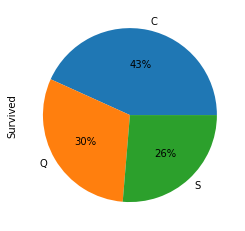

In [7]:
#q5
df_titanic.groupby('Embarked').Survived.mean().plot(kind='pie', autopct='%1.0f%%' )
#'Cherbourg is the most number of people embarked from and Southampton is the least amount of people embarked from.


<AxesSubplot:>

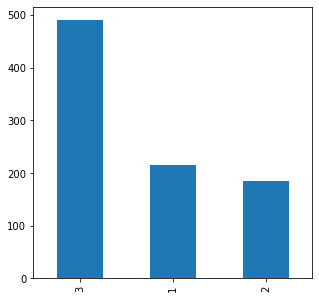

In [8]:
#q6
plt.figure(figsize=(5,5))
df_titanic.Pclass.value_counts().plot(kind='bar')
#Most of the passengers was in the third class.


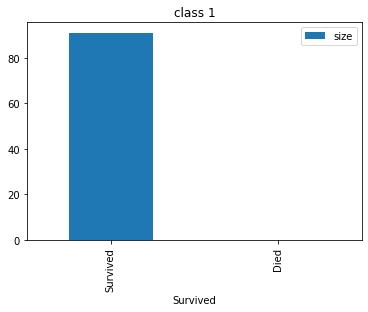

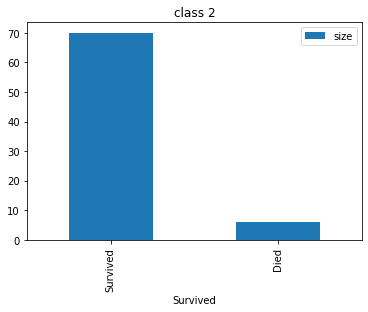

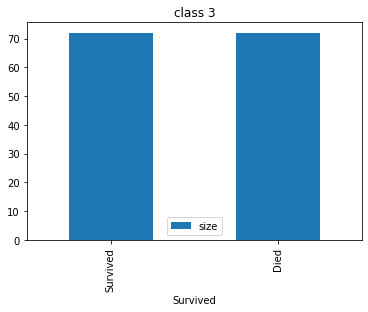

In [48]:
#q7
fd_class1 = len(df_titanic[(data["Sex"] == "female") & (df_titanic["Survived"] == 0)& (df_titanic["Pclass"] == 1)])
fs_class1 = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 1)& (df_titanic["Pclass"] == 1)])

fd_class2 = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 0)& (df_titanic["Pclass"] == 2)])
fs_class2 = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 1)& (df_titanic["Pclass"] == 2)])

fd_class3 = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 0)& (df_titanic["Pclass"] == 3)])
fs_class3 = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 1)& (df_titanic["Pclass"] == 3)])
#fd is female that died, fs means female that survived.
data1 = {'Survived':['Survived','Died' ], "size": [fs_class1,fd_class1]};
df1=pd.DataFrame(data=data1)
data2 = {'Survived':['Survived','Died' ], "size": [fs_class2,fd_class2]};
df2=pd.DataFrame(data=data2)
data3 = {'Survived':['Survived','Died' ], "size": [fs_class3,fd_class3]};
df3=pd.DataFrame(data=data3)                         
 
bar=df1.plot.bar(x='Survived',y='size',title='class 1')
bar=df2.plot.bar(x='Survived',y='size',title='class 2')
bar=df3.plot.bar(x='Survived',y='size',title='class 3')
#it shows the number of female passengers for each ticket class who survived 

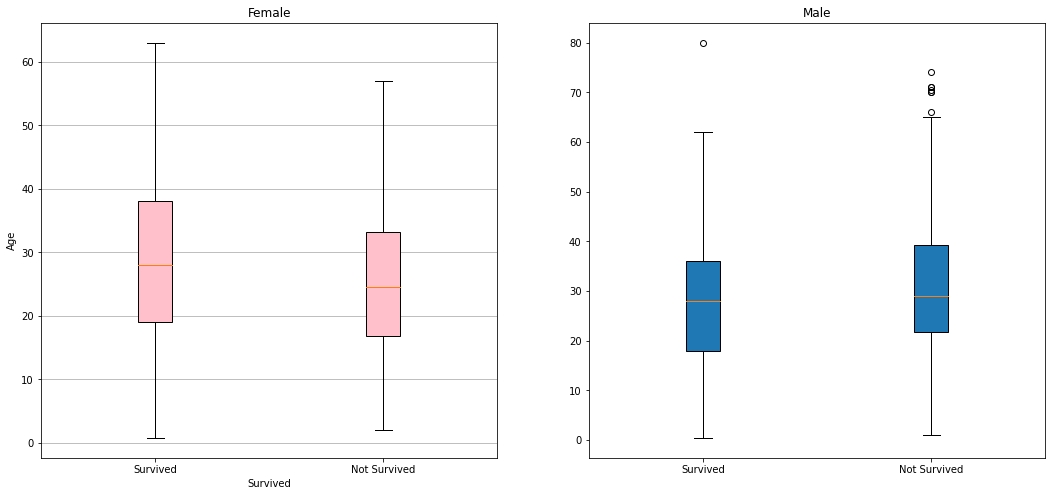

In [37]:
#q8
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
labels = ['Survived', 'Not Survived']
female_s = df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 1)]
female_d = df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 0)]
male_s = df_titanic[(df_titanic["Sex"] == "male") & (df_titanic["Survived"] == 1)]
male_d = df_titanic[(df_titanic["Sex"] == "male") & (df_titanic["Survived"] == 0)]

bx1 = ax1.boxplot([female_s['Age'].dropna(axis=0).values, 
                     female_d['Age'].dropna(axis=0).values], 
                     vert=True,  
                     patch_artist=True,  
                     labels=labels)  
ax1.set_title('Female')

bx2 = ax2.boxplot([male_s['Age'].dropna(axis=0).values,
                    male_d['Age'].dropna(axis=0).values],
                    vert=True, 
                    patch_artist=True,
                    labels=labels)
ax2.set_title('Male')

colors = ['pink', 'pink']

for patch, color in zip(bx1['boxes'], colors):
    patch.set_facecolor(color)


ax1.yaxis.grid(True)
ax1.set_xlabel('Survived')
ax1.set_ylabel('Age')

plt.show()
#it creates two boxplot diagrams using plotlyb library.
#and we can see that male has higher age range than female.

In [41]:
#q9-10
pd.crosstab(df_titanic.Sex, df_titanic.Survived, margins=True, margins_name="Total")
#233 of the females and 109 had survived.
#We can say that women was privileged.

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


<AxesSubplot:>

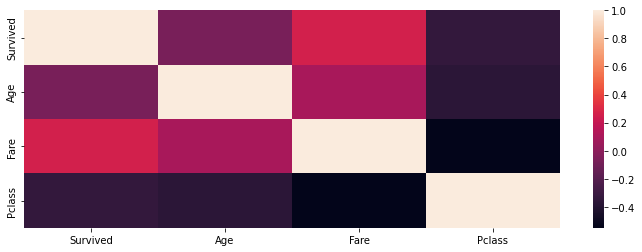

In [39]:
#q11
cols= ['Survived','Age','Sex','Fare','Pclass']
train_corr = df_titanic[cols].corr()
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(train_corr)
#It uses plotly for create heatmap.

<AxesSubplot:>

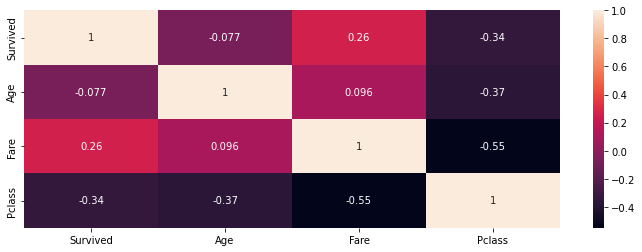

In [11]:
#q12
cols= ['Survived','Age','Sex','Fare','Pclass']
train_corr = df_titanic[cols].corr()
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(train_corr,annot=True)
#Correlation between Pclass and Survived is -0.34 and 
#it is a strong correlation than most of other attributes

In [12]:
#q13
df_titanic['Age'].min()
#youngest passenger was 4 months old.

0.42

In [13]:
#q14
df_titanic['Fare'].mean()
#avareage ticket fare is 32.2042079685746.

32.2042079685746

In [15]:
#q15
df_titanic['Age'][df_titanic['Survived']==1].max()
#Oldest passenger that survived was 80 years old.

80.0

In [14]:
#q16
female = df_titanic['Age'][df_titanic['Survived']==1][df_titanic['Sex']=='female']
female.max()
#oldest female who survived was 63 years old.

63.0

In [16]:
#q17
df_titanic[(df_titanic['Age']<10)&(df_titanic['Parch']==0)]
#there is a child that traveling without parents.
#The child might have traveled with other relations or 
#Child might be taken to the ship for adoption.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


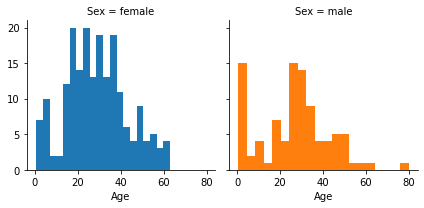

In [25]:
#q18
data= df_titanic[df_titanic['Survived']==1]
age_sex_hist = sns.FacetGrid(data, col='Sex', hue = "Sex")
age_sex_hist.map(plt.hist, 'Age', bins=20)
#if we look at histograms we can see that female had a higher survival chance.

In [18]:
#q19
df_titanic['SibSp'].max()
#the passenger who has the highest number of siblings had 8 siblings.

8

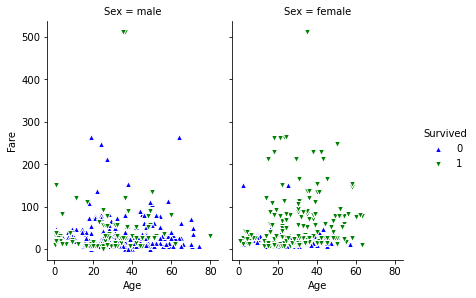

In [29]:
#q20
g = sns.FacetGrid(df_titanic, hue="Survived", col="Sex", margin_titles=True,
                hue_kws=dict(marker=["^", "v"]),palette={1:"green", 0:"blue"})
g.map(plt.scatter, "Age", "Fare",edgecolor="w").add_legend()
plt.subplots_adjust(top=1.3)
#it uses seaborn for creating scatterplot.
#Female had higher survival rate according to scatterplot.